# Titanic Competition - Deep Learning

In [1]:
# Hyperparameters
EPOCHS = 100

In [2]:
# Setup plotting
import matplotlib.pyplot as plt

plt.style.use("seaborn-v0_8-whitegrid")
# Set Matplotlib defaults
plt.rc("figure", autolayout=True)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=18,
    titlepad=10,
)
plt.rc("animation", html="html5")

import numpy as np  # linear algebra
import pandas as pd  # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import KFold

from statistics import mean

import os

from utils import (
    preprocess_data,
    MyModel,
    model_init,
)

## Preprocessing

In [3]:
# Read the data
train_data = pd.read_csv("../input/train.csv").set_index("PassengerId")
test_data = pd.read_csv("../input/test.csv").set_index("PassengerId")

X, y, X_test = preprocess_data(
    train_data,
    test_data,
    label_value="Survived",
    cols_to_drop=["Name", "Ticket", "Cabin"],
)

## Define the model

In [4]:
input_shape = [X.shape[1]]
model = MyModel()

## Start testing

Parameters to Tune:
- L2 regularization strength: 0.001, 0.005, 0.01, 0.05
- Dropout rate: 0.2, 0.3, 0.4, 0.5
- Learning rate: 0.01, 0.001, 0.0001
- Momentum: 0.8, 0.9
- Weight decay: 1e-4, 1e-5
    - Learning rate scheduler: Experiment with different decay schedules or use adaptive learning rates (e.g., ReduceLROnPlateau)
- Batch size: 16, 32, 64

In [5]:
# Define the K-Fold cross-validator (K=5 in this example)
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# DataFrame that saves the parameters with accuracies
accuracies_df = pd.DataFrame(
    columns=[
        "l2_regularization",
        "dropout_rate",
        "lr",
        "momentum",
        "weight_decay",
        "batch_size",
    ]
)

## Parameter tuning

In [7]:
l2_values = [0.001, 0.005, 0.01, 0.05]
dropout_values = [0.2, 0.3, 0.4, 0.5]
lr_values = [0.01, 0.001, 0.0001]
momentum_values = [0.8, 0.9]
decay_values = [1e-4, 1e-5]
batch_values = [16, 32, 64]

num_iter = len(l2_values), len(dropout_values), len(lr_values), len(momentum_values), len(decay_values), len(batch_values)

for l2 in l2_values:
    for dropout in dropout_values:
        for lr in lr_values:
            for momentum in momentum_values:
                for decay in decay_values:
                    for batch in batch_values:
                        acc_list = []
                        for train_index, val_index in kf.split(X):
                            # Split the data into training and testing sets
                            X_train, X_val = X[train_index], X[val_index]
                            y_train, y_val = y[train_index], y[val_index]

                            # Init the model in every iteration

                            model, early_stopping, lrs = model_init(
                                MyModel(l2=l2, dropout=dropout), lr, momentum, decay
                            )


                            history = model.fit(
                                X_train,
                                y_train,
                                validation_data=(X_val, y_val),
                                batch_size=batch,
                                epochs=EPOCHS,
                                callbacks=[early_stopping, lrs],
                                verbose=0,
                            )

                            print(history.history["binary_accuracy"][-1])
                            acc_list.append(history.history["binary_accuracy"][-1])
                        
                        print(
                            f"l2_regularization: {l2}\t dropout_rate: {dropout}\t lr: {lr}\t momentum: {momentum}\t weight_decay: {decay}\t batch_size: {batch}\t accuracy: {mean(acc_list)}"
                        )
                        break
                    break
                break
            break
        break
    break

        "l2_regularization",
        "dropout_rate",
        "lr",
        "momentum",
        "weight_decay",
        "batch_size",


    # binary_accuracies[k_index] = history.history["binary_accuracy"]

    # losses[k_index] = history.history["loss"]

    # val_binary_accuracies[k_index] = history.history["val_binary_accuracy"]

    # val_losses[k_index] = history.history["val_loss"]


    # models[k_index] = model


    # k_index += 1

Epoch 1/100


45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - binary_accuracy: 0.6960 - loss: 0.9729 - val_binary_accuracy: 0.6369 - val_loss: 0.9021 - learning_rate: 0.0100
Epoch 2/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - binary_accuracy: 0.7839 - loss: 0.7910 - val_binary_accuracy: 0.6704 - val_loss: 0.8872 - learning_rate: 0.0100
Epoch 3/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - binary_accuracy: 0.7564 - loss: 0.7940 - val_binary_accuracy: 0.7654 - val_loss: 0.8310 - learning_rate: 0.0100
Epoch 4/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - binary_accuracy: 0.7950 - loss: 0.7575 - val_binary_accuracy: 0.7318 - val_loss: 0.7884 - learning_rate: 0.0100
Epoch 5/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - binary_accuracy: 0.8028 - loss: 0.7692 - val_binary_accuracy: 0.7709 - val_loss: 0.7335 - learning_rate: 0.0100
Epoch 6/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - binary_accuracy: 0.7877 - loss: 0.7816 - val_binary_accuracy: 0.7598 - val_loss: 0.7654 - learning_rate: 0.0100
Epoch 7/100
45/45 ━━━━

In [7]:
print(
    (
        "Last average accuracy: {:0.4f}"
        + "\nMax average accuracy: {:0.4f}"
        + "\nMax accuracy: {:0.4f}"
    ).format(
        mean([accs[-1] for accs in val_binary_accuracies.values()]),
        mean([max(accs) for accs in val_binary_accuracies.values()]),
        max([max(accs) for accs in val_binary_accuracies.values()]),
    )
)

print(
    (
        "\nLast average loss: {:0.4f}"
        + "\nMin average loss: {:0.4f}"
        + "\nMin loss: {:0.4f}"
    ).format(
        mean([loss[-1] for loss in val_losses.values()]),
        mean([min(loss) for loss in val_losses.values()]),
        min([min(loss) for loss in val_losses.values()]),
    )
)


max_key = None
max_value = float("-inf")

for key, value in val_binary_accuracies.items():
    if value[-1] > max_value:
        max_value = value[-1]
        max_key = key


print(
    ("\nBest run: {}" + "\nLast loss: {:0.4f}" + "\nBest loss: {:0.4f}").format(
        max_key, max_value, max(val_binary_accuracies[max_key])
    )
)

Last average accuracy: 0.8238
Max average accuracy: 0.8339
Max accuracy: 0.9213

Last average loss: 0.4341
Min average loss: 0.4280
Min loss: 0.3093

Best run: 9
Last loss: 0.8989
Best loss: 0.9213


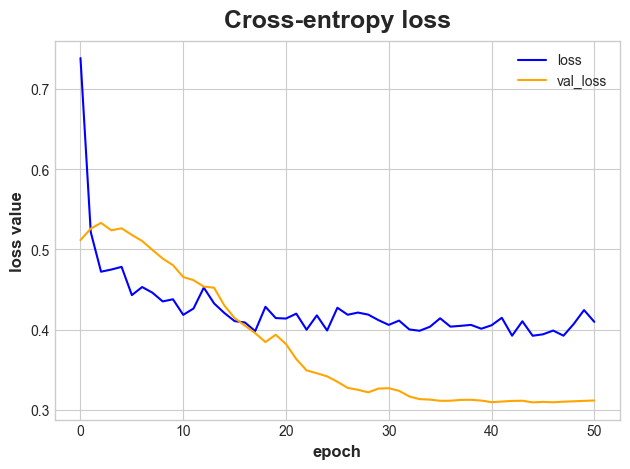

In [8]:
# Plotting loss
plt.plot(losses[max_key], label="loss", color="blue")
plt.plot(val_losses[max_key], label="val_loss", color="orange")

# Adding labels and title
plt.xlabel("epoch")
plt.ylabel("loss value")
plt.title("Cross-entropy loss")

# Adding a legend
plt.legend()

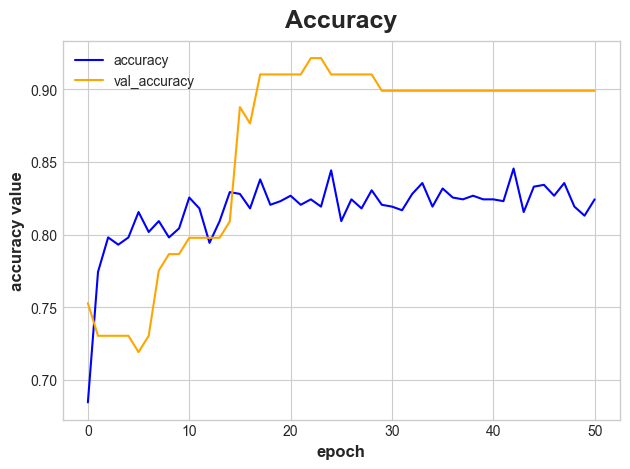

In [9]:
# Plotting loss
plt.plot(binary_accuracies[max_key], label="accuracy", color="blue")
plt.plot(val_binary_accuracies[max_key], label="val_accuracy", color="orange")

# Adding labels and title
plt.xlabel("epoch")
plt.ylabel("accuracy value")
plt.title("Accuracy")

# Adding a legend
plt.legend()

## Submit prediction

In [10]:
# Preprocessing of training data, fit model
model, early_stopping, lrs = model_init(MyModel(), LR, MOMENTUM, DECAY)
model.fit(
    X,
    y,
    batch_size=64,
    epochs=50,
    callbacks=[early_stopping, lrs],
)

# Preprocessing of validation data, get predictions
y_pred = (model.predict(X_test) > 0.5).astype(np.intc)
predictions = np.concatenate(y_pred)

# Saving the predictions
output = pd.DataFrame({"PassengerId": test_data.index, "Survived": predictions})
if not os.path.isdir("output/"):
    os.mkdir("output/")
output.to_csv("output/submission.csv", index=False)

print("Your submission was successfully saved!")

Epoch 1/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - binary_accuracy: 0.6667 - loss: 0.7000 - learning_rate: 0.0100
Epoch 2/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - binary_accuracy: 0.7581 - loss: 0.5779 - learning_rate: 0.0100
Epoch 3/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - binary_accuracy: 0.8134 - loss: 0.4487 - learning_rate: 0.0100
Epoch 4/50
 1/14 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - binary_accuracy: 0.8438 - loss: 0.3600

c:\Users\kkleist\OneDrive - DXC Production\Desktop\github\Titanic-Competition\titanic-comp-venv\lib\site-packages\keras\src\callbacks\early_stopping.py:155: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: binary_accuracy,loss
  current = self.get_monitor_value(logs)


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - binary_accuracy: 0.7920 - loss: 0.4531 - learning_rate: 0.0100
Epoch 5/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - binary_accuracy: 0.8316 - loss: 0.4112 - learning_rate: 0.0100
Epoch 6/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - binary_accuracy: 0.8317 - loss: 0.3933 - learning_rate: 0.0100
Epoch 7/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - binary_accuracy: 0.8088 - loss: 0.4417 - learning_rate: 0.0100
Epoch 8/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - binary_accuracy: 0.8160 - loss: 0.4254 - learning_rate: 0.0100
Epoch 9/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - binary_accuracy: 0.8373 - loss: 0.4006 - learning_rate: 0.0050
Epoch 10/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - binary_accuracy: 0.8161 - loss: 0.4229 - learning_rate: 0.0050
Epoch 11/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - binary_accuracy: 0.8221 - loss: 0.4056 - learning_rate: 0.0050
Epoch 12/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - binary_accuracy: 0.8267 - loss: 0.39